<a href="https://colab.research.google.com/github/MonikSense/RGO-DIFFERENT-GAS/blob/main/RF%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training Accuracy: 1.0000
Training Loss: 0.1791
Test Accuracy: 0.8000
              precision    recall  f1-score   support

        HCHO       0.00      0.00      0.00         1
         NH3       0.67      1.00      0.80         2
         NO2       1.00      1.00      1.00         2

    accuracy                           0.80         5
   macro avg       0.56      0.67      0.60         5
weighted avg       0.67      0.80      0.72         5



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


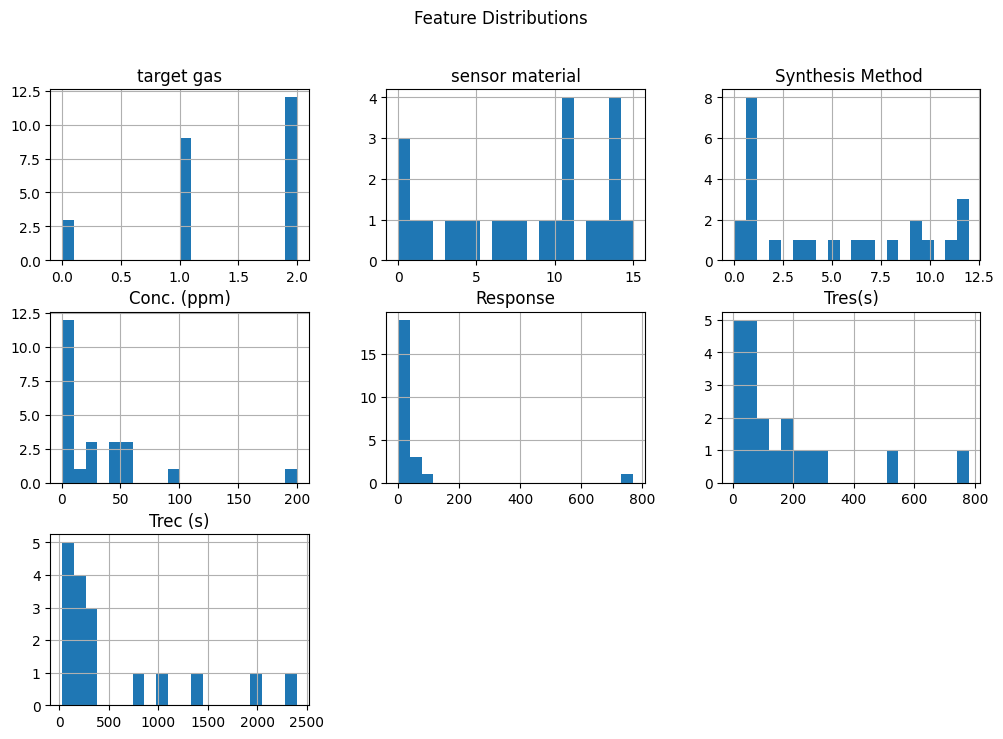

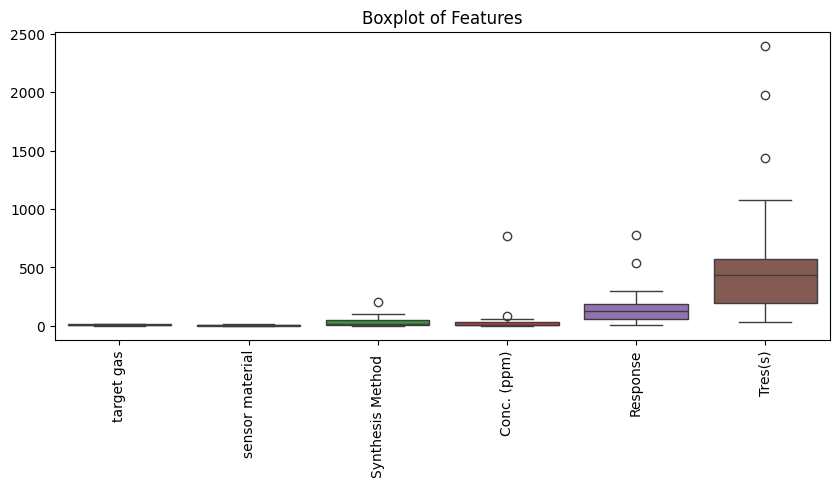

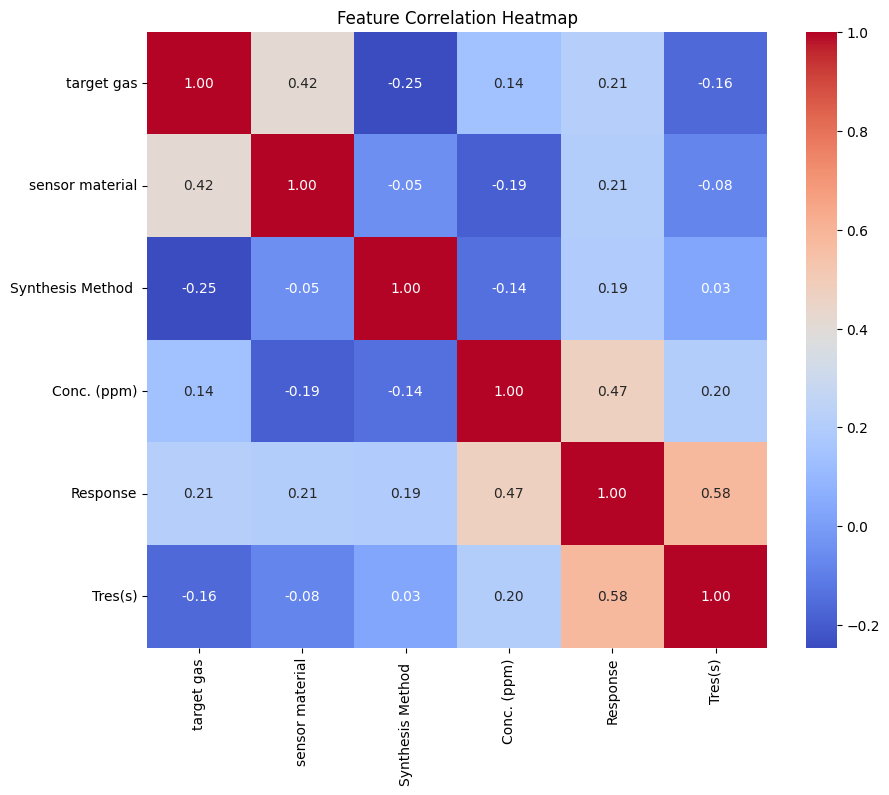

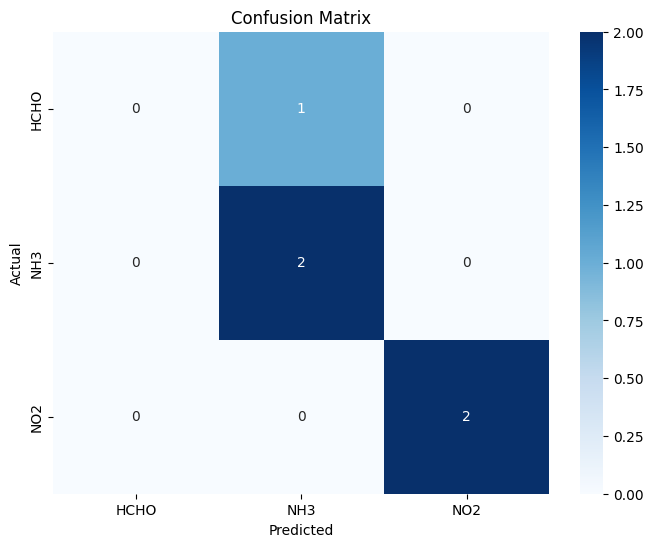

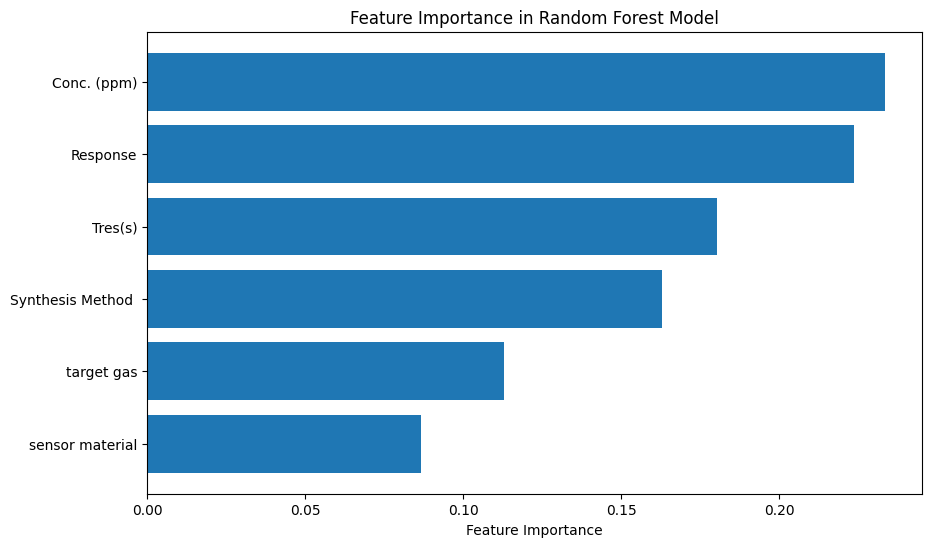

ValueError: multiclass format is not supported

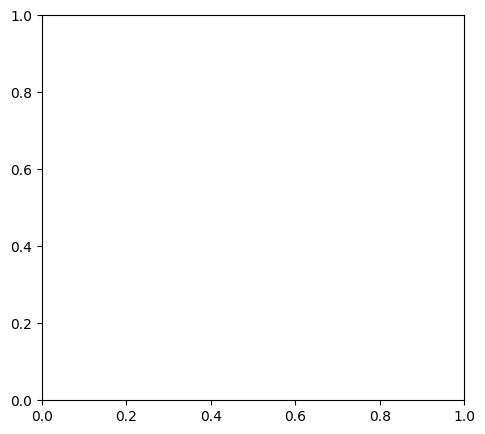

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# Load dataset
url = "https://raw.githubusercontent.com/MonikSense/RGO-DIFFERENT-GAS/refs/heads/main/DATASET%20RGO%20DIFFERENT%20GASES.csv"
df = pd.read_csv(url)

# Encode categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
target = 'target gas'
X = df.drop(columns=[target])
y = df[target]

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=60)

# Train model
clf = RandomForestClassifier(n_estimators=500, random_state=60)
clf.fit(X_train, y_train)

# --- Training Performance ---
y_train_pred = clf.predict(X_train)
y_train_proba = clf.predict_proba(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_loss = log_loss(y_train, y_train_proba)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training Loss: {train_loss:.4f}")

# --- Test Performance ---
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(classification_report(y_test, y_pred, target_names=label_encoders[target].classes_))

# --- Visualization ---

# 1. Histogram of Feature Distributions
df.hist(figsize=(12, 8), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

# 2. Boxplot for Outlier Detection
plt.figure(figsize=(10, 4))
sns.boxplot(data=pd.DataFrame(X_imputed, columns=df.columns[:-1]))
plt.xticks(rotation=90)
plt.title("Boxplot of Features")
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X_imputed, columns=df.columns[:-1]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# 4. Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=label_encoders[target].classes_, yticklabels=label_encoders[target].classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 5. Feature Importance Plot
importances = clf.feature_importances_
feature_names = df.columns[:-1]
sorted_idx = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest Model")
plt.show()

# 6. Precision-Recall and ROC Curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
precision, recall, _ = precision_recall_curve(y_test, y_proba[:, 1])
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

plt.subplot(1, 2, 2)
fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

plt.show()
